## Fire Incidents with Weather

In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sbn
from scipy import stats

In [2]:
# Importing the cleaned/combined data from the csv with the years 2008-2018

firefile = './output/all_with_no_incident_nulls.csv'
df = pd.read_csv(firefile, skip_blank_lines=True, encoding='UTF-8')
len(df)


/Users/laura/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


159803

In [3]:
df['arrive_date_time'] = pd.to_datetime(df['arrive_date_time'])
df['cleared_date_time'] = pd.to_datetime(df['cleared_date_time'])
df['dispatch_date_time'] = pd.to_datetime(df['dispatch_date_time'])


In [4]:
# We were not able to get all the weather points because of API key issues and bad JSON formats
weather = './output/all_weather_data.csv'
dfw = pd.read_csv(weather, skip_blank_lines=True, encoding='UTF-8')
len(dfw)

3287

In [5]:
# Merging the weather data that we have in with the incident data
dfm = pd.merge(df, dfw, on='Date', how='right')

In [6]:
dfm.isna().sum()

OBJECTID                        59
address                         59
address2                     49640
apt_room                     51725
arrive_date_time             25965
cleared_date_time               61
dispatch_date_time              59
exposure                        59
incident_number                 59
incident_type                   59
incident_type_description       59
platoon                         59
station                         81
Longitude                       59
Latitude                        59
Year                            59
Date                            26
Unnamed: 0                       0
Max Temp (f)                    26
Min Temp (f)                    26
Humidity                        26
Precipitation                   26
Weather Conditions              26
Wind Speed                      26
Wind Gust                       26
dtype: int64

In [53]:
dfm.drop(['address','address2','apt_room','arrive_date_time','cleared_date_time','exposure','incident_number','incident_type_description','platoon','station','Longitude','Latitude','Unnamed: 0'], axis=1)
dfm.describe()
# We only have weather from 2010-2018

,OBJECTID,exposure,incident_type,station,Year,Unnamed: 0,Max Temp (f),Min Temp (f),Humidity,Precipitation,Wind Speed,Wind Gust
count,132022.000000,132022.000000,132022.000000,132022.000000,132022.000000,132022.000000,132022.000000,132022.000000,132022.000000,132022.000000,132022.000000,132022.000000
mean,573174.566618,0.005961,585.039122,12.715131,2014.176372,823.458780,71.159966,56.115935,72.278045,4.124488,7.286725,12.554703
std,54983.760508,0.163293,170.058721,7.850916,2.583271,481.668186,17.704067,17.566258,12.768425,10.611385,3.581724,5.063088
min,474769.000000,0.000000,100.000000,1.000000,2010.000000,0.000000,16.000000,1.000000,26.000000,0.000000,0.000000,3.000000
25%,523559.250000,0.000000,511.000000,6.000000,2012.000000,421.000000,58.000000,42.000000,64.000000,0.000000,5.000000,9.000000
50%,577463.000000,0.000000,611.000000,12.000000,2014.000000,815.000000,74.000000,58.000000,73.000000,0.200000,7.000000,12.000000
75%,618706.750000,0.000000,733.000000,19.000000,2016.000000,1212.000000,86.000000,72.000000,82.000000,3.800000,9.000000,15.000000
max,663561.000000,11.000000,9001.000000,29.000000,2018.000000,1825.000000,107.000000,94.000000,100.000000,157.700000,34.000000,43.000000


In [54]:
# First get rid of the ones where we have weather but no incidents and the null stations while we're at it
dfm = dfm.loc[dfm['station'].notnull()]
len(dfm)

132022

In [55]:
# Limit the incidents to fires
fires = dfm.loc[dfm['incident_type'] < 200,:]

In [56]:
fires['Month'] = pd.DatetimeIndex(fires['dispatch_date_time']).month

/Users/laura/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
fires17 = fires.loc[fires['Year']==2017]
len(fires17)

1344

In [88]:
fire_mo17 = fires17.groupby(['Month'], sort=True)
fire_mo = fires.groupby('Month', sort=True)

In [89]:
# month_count = fires.groupby(['Year','Month'])
wdf = pd.DataFrame()
wdf['Incidents'] = fire_mo['OBJECTID'].count()/10
wdf['Mean_Max_Temp'] = fire_mo['Max Temp (f)'].mean()
wdf['Mean_Min_Temp'] = fire_mo['Min Temp (f)'].mean()
wdf['Humidity'] = fire_mo['Humidity'].mean()
wdf['Max_Precip'] = fire_mo['Precipitation'].max()
wdf['Max_Wind_Speed'] = fire_mo['Wind Speed'].max()
# wdf['Max_Wind_Gust'] = month_count['Wind Gust'].max()
wdf


,Incidents,Mean_Max_Temp,Mean_Min_Temp,Humidity,Max_Precip,Max_Wind_Speed
Month,,,,,,
1,93.8,47.215352,33.132196,70.353945,47.1,21.0
2,90.7,53.718853,37.480706,68.714443,53.5,22.0
3,105.7,61.279092,43.116367,67.254494,30.9,19.0
4,119.0,72.031092,53.863866,65.861345,68.0,21.0
5,82.2,80.771290,64.577859,70.798054,50.0,16.0
6,86.7,88.730104,73.797001,68.602076,30.7,14.0
7,96.6,92.598344,77.211180,69.224638,54.9,17.0
8,87.0,89.786207,75.380460,70.313793,45.9,22.0
9,70.2,83.951567,67.454416,74.240741,108.4,34.0


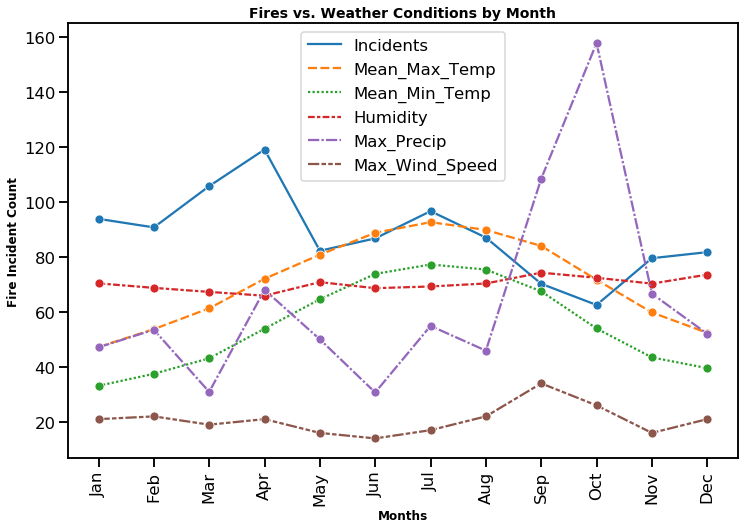

In [92]:
sbn.lineplot(data=wdf, marker='o')
fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.ylimit=(0,200)
fig.xlimit=(0,30)
x = [1,2,3,4,5,6,7,8,9,10,11,12]
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep','Oct','Nov','Dec']
# Add some labels and title
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Months', fontsize=12, fontweight='bold')
plt.ylabel('Fire Incident Count', fontsize=12, fontweight='bold')
plt.title('Fires vs. Weather Conditions by Month', fontsize=14, fontweight='bold')
plt.legend(loc='best')
# Save the figure
sbn.set_context("talk")
plt.savefig('./graphics/weather_fires_by_month.png')

In [98]:
storms = dfm.loc[dfm['incident_type'] >= 800,:]
storms['Month'] = pd.DatetimeIndex(storms['dispatch_date_time']).month
storms['Years'] = pd.DatetimeIndex(storms['dispatch_date_time']).year
month_count = storms.groupby(['Month'])

/Users/laura/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/laura/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [102]:
wdf = pd.DataFrame()
wdf['Incidents'] = month_count['OBJECTID'].count()
wdf['Mean_Max_Temp'] = month_count['Max Temp (f)'].mean()
wdf['Mean_Min_Temp'] = month_count['Min Temp (f)'].mean()
wdf['Humidity'] = month_count['Humidity'].mean()
wdf['Max_Precip'] = month_count['Precipitation'].max()
wdf['Max_Wind_Speed'] = month_count['Wind Speed'].max()

wdf

,Incidents,Mean_Max_Temp,Mean_Min_Temp,Humidity,Max_Precip,Max_Wind_Speed
Month,,,,,,
1,23,50.478261,36.347826,73.521739,26.7,17.0
2,25,49.120000,33.840000,73.520000,30.3,18.0
3,23,62.260870,44.652174,64.478261,14.7,13.0
4,73,70.849315,56.342466,74.739726,35.3,19.0
5,42,81.119048,65.285714,74.904762,19.2,13.0
6,57,87.719298,74.526316,74.719298,27.7,13.0
7,78,92.320513,78.320513,72.589744,16.7,11.0
8,53,88.358491,75.245283,72.452830,25.6,22.0
9,36,84.555556,70.111111,78.527778,62.7,34.0


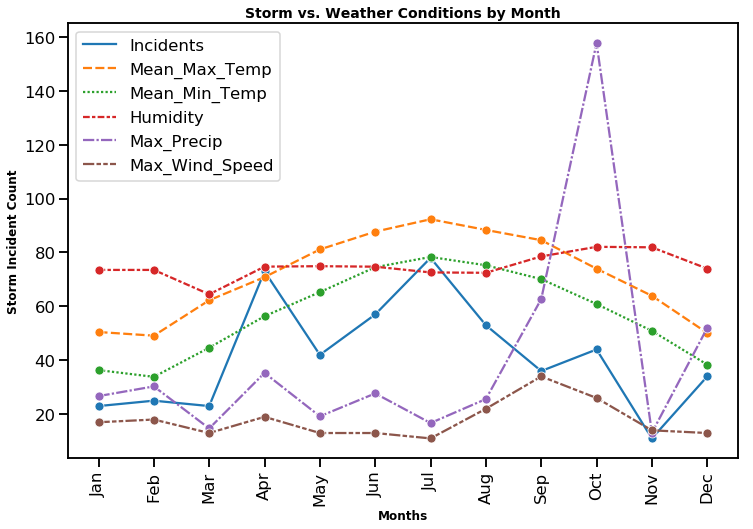

In [103]:
sbn.lineplot(data=wdf, marker='o')
fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.ylimit=(0,200)
fig.xlimit=(0,30)
x = [1,2,3,4,5,6,7,8,9,10,11,12]
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep','Oct','Nov','Dec']
# Add some labels and title
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Months', fontsize=12, fontweight='bold')
plt.ylabel('Storm Incident Count', fontsize=12, fontweight='bold')
plt.title('Storm vs. Weather Conditions by Month', fontsize=14, fontweight='bold')
plt.legend(loc='best')
# Save the figure
sbn.set_context("talk")
plt.savefig('./graphics/weather_storm_by_month.png')